In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
df = pd.read_csv("bank_Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [4]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.Gender.replace({'Male':1, 'Female':0}, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df1 = pd.get_dummies(data=df, columns=['Geography'], drop_first=True)
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


In [9]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [10]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


Text(0, 0.5, 'No. of people')

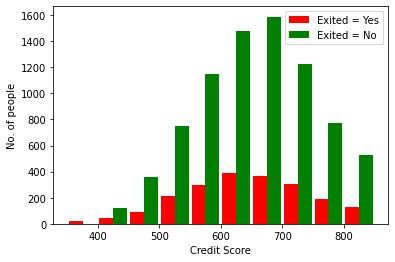

In [11]:
credit_score_exited_yes = df1[df1.Exited==1].CreditScore
credit_score_exited_no = df1[df1.Exited==0].CreditScore

plt.hist([credit_score_exited_yes,credit_score_exited_no], rwidth=0.9, color=['red', 'green'], label=['Exited = Yes','Exited = No'])
plt.legend()
plt.xlabel('Credit Score')
plt.ylabel('No. of people')

Text(0, 0.5, 'No. of people')

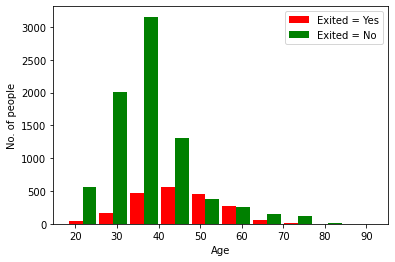

In [12]:
Age_exited_yes = df1[df1.Exited==1].Age
Age_exited_no = df1[df1.Exited==0].Age

plt.hist([Age_exited_yes,Age_exited_no], rwidth=0.9, color=['red', 'green'], label=['Exited = Yes','Exited = No'])
plt.legend()
plt.xlabel('Age')
plt.ylabel('No. of people')

Text(0, 0.5, 'No. of people')

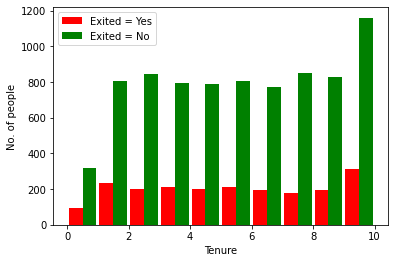

In [13]:
Tenure_exited_yes = df1[df1.Exited==1].Tenure
Tenure_exited_no = df1[df1.Exited==0].Tenure

plt.hist([Tenure_exited_yes,Tenure_exited_no], rwidth=0.9, color=['red', 'green'], label=['Exited = Yes','Exited = No'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('No. of people')

Text(0, 0.5, 'No. of people')

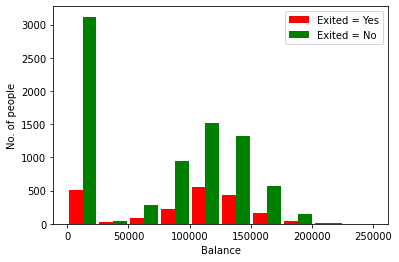

In [14]:
Balance_exited_yes = df1[df1.Exited==1].Balance
Balance_exited_no = df1[df1.Exited==0].Balance

plt.hist([Balance_exited_yes,Balance_exited_no], rwidth=0.9, color=['red', 'green'], label=['Exited = Yes','Exited = No'])
plt.legend()
plt.xlabel('Balance')
plt.ylabel('No. of people')

Text(0, 0.5, 'No. of people')

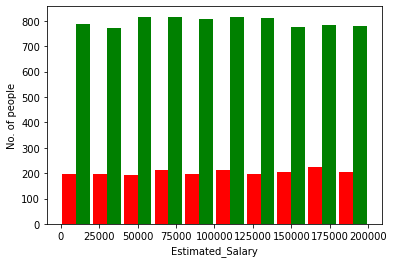

In [15]:
Estimated_Salary_exited_yes = df1[df1.Exited==1].EstimatedSalary
Estimated_Salary_exited_no = df1[df1.Exited==0].EstimatedSalary

plt.hist([Estimated_Salary_exited_yes,Estimated_Salary_exited_no], rwidth=0.9, color=['red', 'green'], label=['Exited = Yes','Exited = No'])
# plt.legend()
plt.xlabel('Estimated_Salary')
plt.ylabel('No. of people')

In [16]:
df1.nunique()

CreditScore           460
Gender                  2
Age                    70
Tenure                 11
Balance              6382
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary      9999
Exited                  2
Geography_Germany       2
Geography_Spain         2
dtype: int64

In [17]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts','EstimatedSalary']

scaler = MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,1,0


In [18]:
x=df1.drop(['Exited'], axis=1).values
y=df1.Exited.values

In [19]:
x.shape

(10000, 11)

In [20]:
y.shape

(10000,)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
print(f'training sizes:  x_train {x_train.shape}, y_train {y_train.shape}')
print(f'testing sizes: x_test {x_test.shape}, y_test {y_test.shape}')

training sizes:  x_train (8000, 11), y_train (8000,)
testing sizes: x_test (2000, 11), y_test (2000,)


In [23]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(11,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=150)

Epoch 1/150
250/250 [==============================] - 3s 7ms/step - loss: 0.5174 - accuracy: 0.7920
Epoch 2/150
250/250 [==============================] - 1s 4ms/step - loss: 0.4819 - accuracy: 0.7962
Epoch 3/150
250/250 [==============================] - 1s 4ms/step - loss: 0.4785 - accuracy: 0.7962
Epoch 4/150
250/250 [==============================] - 1s 5ms/step - loss: 0.4749 - accuracy: 0.7962
Epoch 5/150
250/250 [==============================] - 2s 7ms/step - loss: 0.4721 - accuracy: 0.7962
Epoch 6/150
250/250 [==============================] - 1s 5ms/step - loss: 0.4696 - accuracy: 0.7962
Epoch 7/150
250/250 [==============================] - 1s 5ms/step - loss: 0.4672 - accuracy: 0.7962
Epoch 8/150
250/250 [==============================] - 2s 7ms/step - loss: 0.4650 - accuracy: 0.7962
Epoch 9/150
250/250 [==============================] - 2s 6ms/step - loss: 0.4628 - accuracy: 0.7962
Epoch 10/150
250/250 [==============================] - 1s 5ms/step - loss: 0.4607 - accura

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dense_2 (Dense)             (None, 5)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


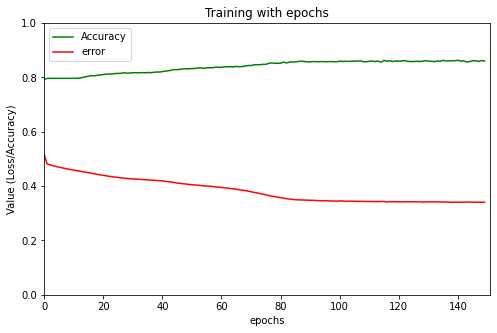

In [26]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'],color='green',label='Accuracy')
plt.plot(history.history['loss'],color='red', label='error')
plt.xlabel('epochs')
plt.ylabel('Value (Loss/Accuracy)')
plt.title("Training with epochs")
plt.xlim(0,151)
plt.ylim(0,1)
plt.legend(loc='upper left')

In [27]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 1s 5ms/step - loss: 0.3367 - accuracy: 0.8645


[0.3367209732532501, 0.8644999861717224]

In [28]:
yp = model.predict(x_test)

63/63 [==============================] - 0s 3ms/step


In [29]:
yp

array([[0.02460303],
       [0.06826356],
       [0.04159487],
       ...,
       [0.8764111 ],
       [0.02059696],
       [0.10687973]], dtype=float32)

In [30]:
y_pred=[]
for val in yp:
    if(val>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.50      0.60       407

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



Text(33.0, 0.5, 'Predicted Value')

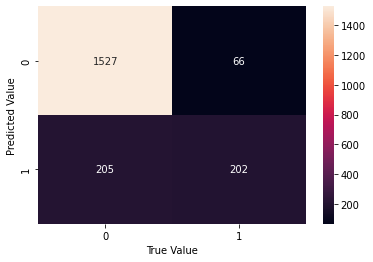

In [32]:
import seaborn as sb

cm=confusion_matrix(y_test, y_pred)

sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')